In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.stats import shapiro, normaltest, anderson, levene, ttest_ind, wilcoxon

## Funções
### Testes Estatísticos

In [2]:
def shapiro_wilk_test(data):
    # normality test
    stat, p = shapiro(data)
    #print('\tStatistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        return ('Sample looks Gaussian (fail to reject H0)', p)
    else:
        return ('Sample does not look Gaussian (reject H0)', p)

In [3]:
def shapiro_wilk_p(data):
    # normality test
    stat, p = shapiro(data)
    return p

In [4]:
def tstudent_test(data1, data2):
    print("\tT-Student Test:")
    # normality test
    stat, p = ttest_ind(data1, data2, equal_var=True)
    print('\tStatistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('\tThe difference between the means is not statistically significant (do not reject H0)')
    else:
        print('\tThe difference between the means is statistically significant (reject H0)')
    return

In [5]:
def wilcoxon_test(data1, data2):
    print("\tWilcoxon Test:")
    # normality test
    stat, p = wilcoxon(data1, data2)
    print('\tStatistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('\tThe difference between the means is not statistically significant (do not reject H0)')
    else:
        print('\tThe difference between the means is statistically significant (reject H0)')
    return

In [6]:
def perform_fulltest(data1, data2, alpha1, alpha2):
    if alpha1 > 0.05 and alpha2 > 0.05:
        tstudent_test(data1, data2)
    else:
        wilcoxon_test(data1, data2)
    return

In [7]:
def plot_boxplot(data, label_description):
    # Multiple box plots on one Axes
    fig, ax = plt.subplots(figsize=(16.00,9.00))
    # rectangular box plot
    bplot = ax.boxplot(data,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        #labels=label_description)  # will be used to label x-ticks
    )
    #ax1.set_title('Rectangular box plot')
    ax.set_xticklabels(label_description, fontsize=8)
    colors = ['lightgreen', 'lightyellow', 'lightyellow', 'lightyellow', 'lightyellow', 'lightyellow', 'lightyellow', 'lightyellow', ]
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    return plt

## Main

In [8]:
base = pd.read_csv('models/07_model_avaliation_base.csv', low_memory=False)

### Médias e Desvio Padrão

In [9]:
lista_classificador = ['randomforest', 'xgboost']
lista_oversampling = [True, False]
lista_undersampling = [True, False]

In [10]:
base_statistics = pd.DataFrame(columns=['classificador', 'oversampling', 'undersampling', 
                                        'media_news', 'std_news', 'normality_news', 'normality_p_news',
                                        'media_opinion', 'std_opinion', 'normality_opinion', 'normality_p_opinion', 
                                        'media_fake', 'std_fake', 'normality_fake', 'normality_p_fake'])

for classificador in lista_classificador:
    for oversampling in lista_oversampling:
        for undersampling in lista_undersampling:
            base_aux = base[(base.classifier == classificador) & (base.oversampling == oversampling) & (base.undersampling == undersampling)]
            media_news = np.mean(base_aux.f_score_news)
            std_news = np.std(base_aux.f_score_news)
            normality_news, normality_p_news = shapiro_wilk_test(base_aux.f_score_news)
            media_opinion = np.mean(base_aux.f_score_opinion)
            std_opinion = np.std(base_aux.f_score_opinion)
            normality_opinion, normality_p_opinion = shapiro_wilk_test(base_aux.f_score_opinion)
            media_fake = np.mean(base_aux.f_score_fake)
            std_fake = np.std(base_aux.f_score_fake)
            normality_fake, normality_p_fake = shapiro_wilk_test(base_aux.f_score_fake)
            
            lista_resultados = [classificador, oversampling, undersampling, 
                                media_news, std_news, normality_news, normality_p_news,
                                media_opinion, std_opinion, normality_opinion, normality_p_opinion, 
                                media_fake, std_fake, normality_fake, normality_p_fake]

            base_statistics.loc[len(base_statistics)] = lista_resultados

base_statistics.to_csv('models/08_statistics_fscore_base.csv', index=False)

In [11]:
base_statistics

,classificador,oversampling,undersampling,media_news,std_news,normality_news,normality_p_news,media_opinion,std_opinion,normality_opinion,normality_p_opinion,media_fake,std_fake,normality_fake,normality_p_fake
0,randomforest,True,True,0.506046,0.035049,Sample looks Gaussian (fail to reject H0),0.219329,0.803176,0.017971,Sample looks Gaussian (fail to reject H0),0.542369,0.329885,0.055384,Sample looks Gaussian (fail to reject H0),0.345779
1,randomforest,True,False,0.511794,0.028128,Sample looks Gaussian (fail to reject H0),0.540507,0.799880,0.020293,Sample looks Gaussian (fail to reject H0),0.402381,0.331927,0.058039,Sample looks Gaussian (fail to reject H0),0.349095
2,randomforest,False,True,0.484000,0.023081,Sample looks Gaussian (fail to reject H0),0.269019,0.704843,0.029085,Sample looks Gaussian (fail to reject H0),0.645580,0.275225,0.073608,Sample does not look Gaussian (reject H0),0.048199
3,randomforest,False,False,0.497630,0.042480,Sample looks Gaussian (fail to reject H0),0.586298,0.842558,0.018031,Sample looks Gaussian (fail to reject H0),0.419055,0.260041,0.099948,Sample looks Gaussian (fail to reject H0),0.056195
4,xgboost,True,True,0.499792,0.037896,Sample looks Gaussian (fail to reject H0),0.287883,0.818786,0.023848,Sample looks Gaussian (fail to reject H0),0.908888,0.322230,0.069443,Sample looks Gaussian (fail to reject H0),0.397202
5,xgboost,True,False,0.502451,0.035377,Sample does not look Gaussian (reject H0),0.035786,0.811222,0.016419,Sample looks Gaussian (fail to reject H0),0.246928,0.318007,0.040375,Sample looks Gaussian (fail to reject H0),0.071140
6,xgboost,False,True,0.484766,0.041385,Sample looks Gaussian (fail to reject H0),0.184454,0.728330,0.030634,Sample looks Gaussian (fail to reject H0),0.504816,0.301399,0.044747,Sample looks Gaussian (fail to reject H0),0.954220
7,xgboost,False,False,0.473629,0.050494,Sample looks Gaussian (fail to reject H0),0.973451,0.834764,0.017370,Sample looks Gaussian (fail to reject H0),0.434710,0.274633,0.101448,Sample does not look Gaussian (reject H0),0.039189


### Seleção dos melhores modelos

#### News

In [12]:
base_statistics[base_statistics.media_news == max(base_statistics.media_news)]

,classificador,oversampling,undersampling,media_news,std_news,normality_news,normality_p_news,media_opinion,std_opinion,normality_opinion,normality_p_opinion,media_fake,std_fake,normality_fake,normality_p_fake
1,randomforest,True,False,0.511794,0.028128,Sample looks Gaussian (fail to reject H0),0.540507,0.79988,0.020293,Sample looks Gaussian (fail to reject H0),0.402381,0.331927,0.058039,Sample looks Gaussian (fail to reject H0),0.349095


#### Opinion

In [13]:
base_statistics[base_statistics.media_opinion == max(base_statistics.media_opinion)]

,classificador,oversampling,undersampling,media_news,std_news,normality_news,normality_p_news,media_opinion,std_opinion,normality_opinion,normality_p_opinion,media_fake,std_fake,normality_fake,normality_p_fake
3,randomforest,False,False,0.49763,0.04248,Sample looks Gaussian (fail to reject H0),0.586298,0.842558,0.018031,Sample looks Gaussian (fail to reject H0),0.419055,0.260041,0.099948,Sample looks Gaussian (fail to reject H0),0.056195


#### Fake

In [14]:
base_statistics[base_statistics.media_fake == max(base_statistics.media_fake)]

,classificador,oversampling,undersampling,media_news,std_news,normality_news,normality_p_news,media_opinion,std_opinion,normality_opinion,normality_p_opinion,media_fake,std_fake,normality_fake,normality_p_fake
1,randomforest,True,False,0.511794,0.028128,Sample looks Gaussian (fail to reject H0),0.540507,0.79988,0.020293,Sample looks Gaussian (fail to reject H0),0.402381,0.331927,0.058039,Sample looks Gaussian (fail to reject H0),0.349095


### Comparações do melhor algoritmo em relação aos demais

In [15]:
rf_ov_false_un_false = base[(base.classifier == 'randomforest') & (base.oversampling == False) & (base.undersampling == False)]
rf_ov_false_un_true = base[(base.classifier == 'randomforest') & (base.oversampling == False) & (base.undersampling == True)]
rf_ov_true_un_false = base[(base.classifier == 'randomforest') & (base.oversampling == True) & (base.undersampling == False)]
rf_ov_true_un_true = base[(base.classifier == 'randomforest') & (base.oversampling == True) & (base.undersampling == True)]
xgb_ov_false_un_false = base[(base.classifier == 'xgboost') & (base.oversampling == False) & (base.undersampling == False)]
xgb_ov_false_un_true = base[(base.classifier == 'xgboost') & (base.oversampling == False) & (base.undersampling == True)]
xgb_ov_true_un_false = base[(base.classifier == 'xgboost') & (base.oversampling == True) & (base.undersampling == False)]
xgb_ov_true_un_true = base[(base.classifier == 'xgboost') & (base.oversampling == True) & (base.undersampling == True)]

#### News

In [16]:
print('RF, OV=True, UN=False X RF, OV=False, UN=False')
perform_fulltest(rf_ov_true_un_false.f_score_opinion, rf_ov_false_un_false.f_score_opinion, shapiro_wilk_p(rf_ov_true_un_false.f_score_opinion), shapiro_wilk_p(rf_ov_false_un_false.f_score_news))
print('RF, OV=True, UN=False X RF, OV=False, UN=True')
perform_fulltest(rf_ov_true_un_false.f_score_news, rf_ov_false_un_true.f_score_news, shapiro_wilk_p(rf_ov_true_un_false.f_score_news), shapiro_wilk_p(rf_ov_false_un_true.f_score_news))
print('RF, OV=True, UN=False X RF, OV=True, UN=True')
perform_fulltest(rf_ov_true_un_false.f_score_news, rf_ov_true_un_true.f_score_news, shapiro_wilk_p(rf_ov_true_un_false.f_score_news), shapiro_wilk_p(rf_ov_true_un_true.f_score_news))
print('RF, OV=True, UN=False X XGB, OV=False, UN=False')
perform_fulltest(rf_ov_true_un_false.f_score_news, xgb_ov_false_un_false.f_score_news, shapiro_wilk_p(rf_ov_true_un_false.f_score_news), shapiro_wilk_p(xgb_ov_false_un_false.f_score_news))
print('RF, OV=True, UN=False X XGB, OV=False, UN=True')
perform_fulltest(rf_ov_true_un_false.f_score_news, xgb_ov_false_un_true.f_score_news, shapiro_wilk_p(rf_ov_true_un_false.f_score_news), shapiro_wilk_p(xgb_ov_false_un_true.f_score_news))
print('RF, OV=True, UN=False X XGB, OV=True, UN=False')
perform_fulltest(rf_ov_true_un_false.f_score_news, xgb_ov_true_un_false.f_score_news, shapiro_wilk_p(rf_ov_true_un_false.f_score_news), shapiro_wilk_p(xgb_ov_true_un_false.f_score_news))
print('RF, OV=True, UN=False X XGB, OV=True, UN=True')
perform_fulltest(rf_ov_true_un_false.f_score_news, xgb_ov_true_un_true.f_score_news, shapiro_wilk_p(rf_ov_true_un_false.f_score_news), shapiro_wilk_p(xgb_ov_true_un_true.f_score_news))

RF, OV=True, UN=False X RF, OV=False, UN=False
	T-Student Test:
	Statistics=-4.716, p=0.000
	The difference between the means is statistically significant (reject H0)
RF, OV=True, UN=False X RF, OV=False, UN=True
	T-Student Test:
	Statistics=2.292, p=0.034
	The difference between the means is statistically significant (reject H0)
RF, OV=True, UN=False X RF, OV=True, UN=True
	T-Student Test:
	Statistics=0.384, p=0.706
	The difference between the means is not statistically significant (do not reject H0)
RF, OV=True, UN=False X XGB, OV=False, UN=False
	T-Student Test:
	Statistics=1.981, p=0.063
	The difference between the means is not statistically significant (do not reject H0)
RF, OV=True, UN=False X XGB, OV=False, UN=True
	T-Student Test:
	Statistics=1.620, p=0.123
	The difference between the means is not statistically significant (do not reject H0)
RF, OV=True, UN=False X XGB, OV=True, UN=False
	Wilcoxon Test:
	Statistics=21.000, p=0.557
	The difference between the means is not statis

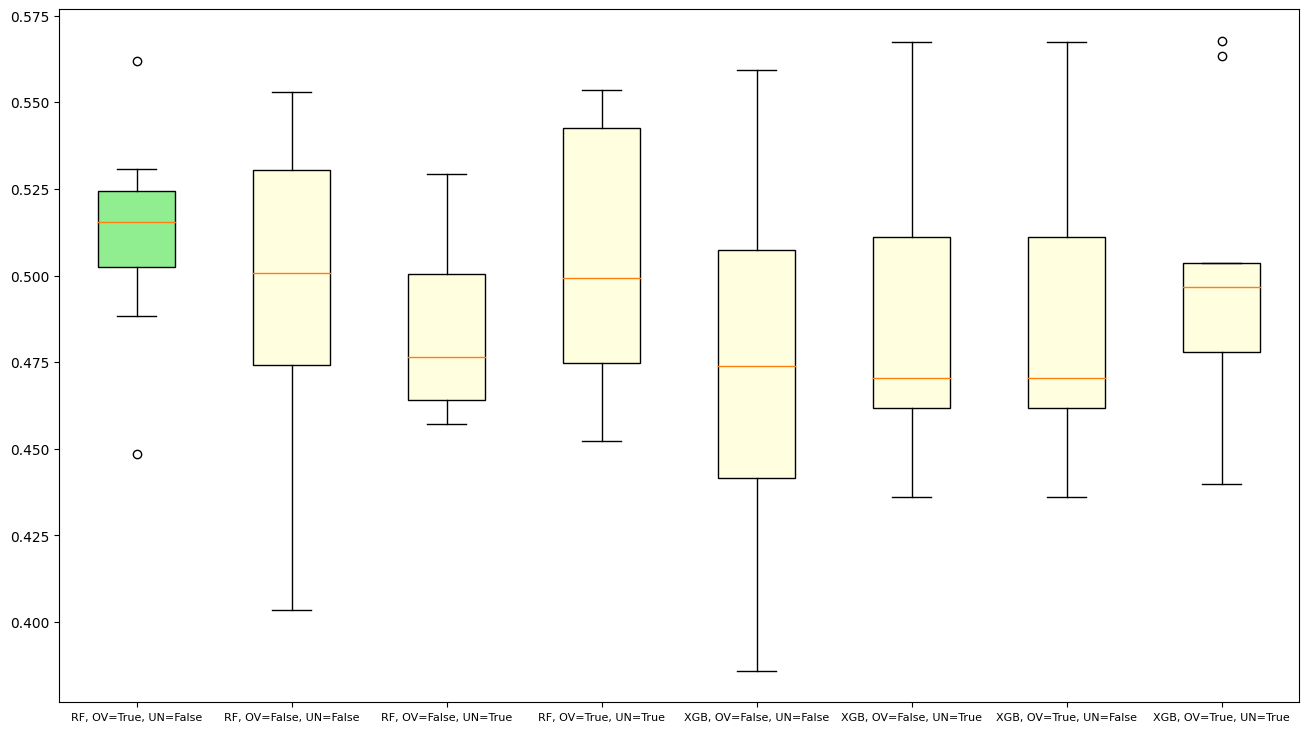

In [17]:
label_description_news = ['RF, OV=True, UN=False', 
                     'RF, OV=False, UN=False', 'RF, OV=False, UN=True', 
                     'RF, OV=True, UN=True', 
                     'XGB, OV=False, UN=False', 'XGB, OV=False, UN=True', 
                     'XGB, OV=True, UN=False', 'XGB, OV=True, UN=True'
                    ]
data_news = [rf_ov_true_un_false.f_score_news, 
         rf_ov_false_un_false.f_score_news, rf_ov_false_un_true.f_score_news, 
         rf_ov_true_un_true.f_score_news,
         xgb_ov_false_un_false.f_score_news, xgb_ov_false_un_true.f_score_news,
         xgb_ov_false_un_true.f_score_news, xgb_ov_true_un_true.f_score_news
        ]
plt_news = plot_boxplot(data_news, label_description_news)
plt_news.show()
plt_news.savefig('models/boxplot/boxplot_news.png', format='png')
plt_news.close()

#### Opinion

In [18]:
print('RF, OV=False, UN=False X RF, OV=False, UN=True')
perform_fulltest(rf_ov_false_un_false.f_score_opinion, rf_ov_false_un_true.f_score_opinion, shapiro_wilk_p(rf_ov_false_un_false.f_score_opinion), shapiro_wilk_p(rf_ov_false_un_true.f_score_opinion))
print('RF, OV=False, UN=False X RF, OV=True, UN=False')
perform_fulltest(rf_ov_false_un_false.f_score_opinion, rf_ov_true_un_false.f_score_opinion, shapiro_wilk_p(rf_ov_false_un_false.f_score_opinion), shapiro_wilk_p(rf_ov_true_un_false.f_score_opinion))
print('RF, OV=False, UN=False X RF, OV=True, UN=True')
perform_fulltest(rf_ov_false_un_false.f_score_opinion, rf_ov_true_un_true.f_score_opinion, shapiro_wilk_p(rf_ov_false_un_false.f_score_opinion), shapiro_wilk_p(rf_ov_true_un_true.f_score_opinion))
print('RF, OV=False, UN=False X XGB, OV=False, UN=False')
perform_fulltest(rf_ov_false_un_false.f_score_opinion, xgb_ov_false_un_false.f_score_opinion, shapiro_wilk_p(rf_ov_false_un_false.f_score_opinion), shapiro_wilk_p(xgb_ov_false_un_false.f_score_opinion))
print('RF, OV=False, UN=False X XGB, OV=False, UN=True')
perform_fulltest(rf_ov_false_un_false.f_score_opinion, xgb_ov_false_un_true.f_score_opinion, shapiro_wilk_p(rf_ov_false_un_false.f_score_opinion), shapiro_wilk_p(xgb_ov_false_un_true.f_score_opinion))
print('RF, OV=False, UN=False X XGB, OV=True, UN=False')
perform_fulltest(rf_ov_false_un_false.f_score_opinion, xgb_ov_true_un_false.f_score_opinion, shapiro_wilk_p(rf_ov_false_un_false.f_score_opinion), shapiro_wilk_p(xgb_ov_true_un_false.f_score_opinion))
print('RF, OV=False, UN=False X XGB, OV=True, UN=True')
perform_fulltest(rf_ov_false_un_false.f_score_opinion, xgb_ov_true_un_true.f_score_opinion, shapiro_wilk_p(rf_ov_false_un_false.f_score_opinion), shapiro_wilk_p(xgb_ov_true_un_true.f_score_opinion))

RF, OV=False, UN=False X RF, OV=False, UN=True
	T-Student Test:
	Statistics=12.073, p=0.000
	The difference between the means is statistically significant (reject H0)
RF, OV=False, UN=False X RF, OV=True, UN=False
	T-Student Test:
	Statistics=4.716, p=0.000
	The difference between the means is statistically significant (reject H0)
RF, OV=False, UN=False X RF, OV=True, UN=True
	T-Student Test:
	Statistics=4.641, p=0.000
	The difference between the means is statistically significant (reject H0)
RF, OV=False, UN=False X XGB, OV=False, UN=False
	T-Student Test:
	Statistics=0.934, p=0.363
	The difference between the means is not statistically significant (do not reject H0)
RF, OV=False, UN=False X XGB, OV=False, UN=True
	T-Student Test:
	Statistics=9.641, p=0.000
	The difference between the means is statistically significant (reject H0)
RF, OV=False, UN=False X XGB, OV=True, UN=False
	T-Student Test:
	Statistics=3.855, p=0.001
	The difference between the means is statistically significant (

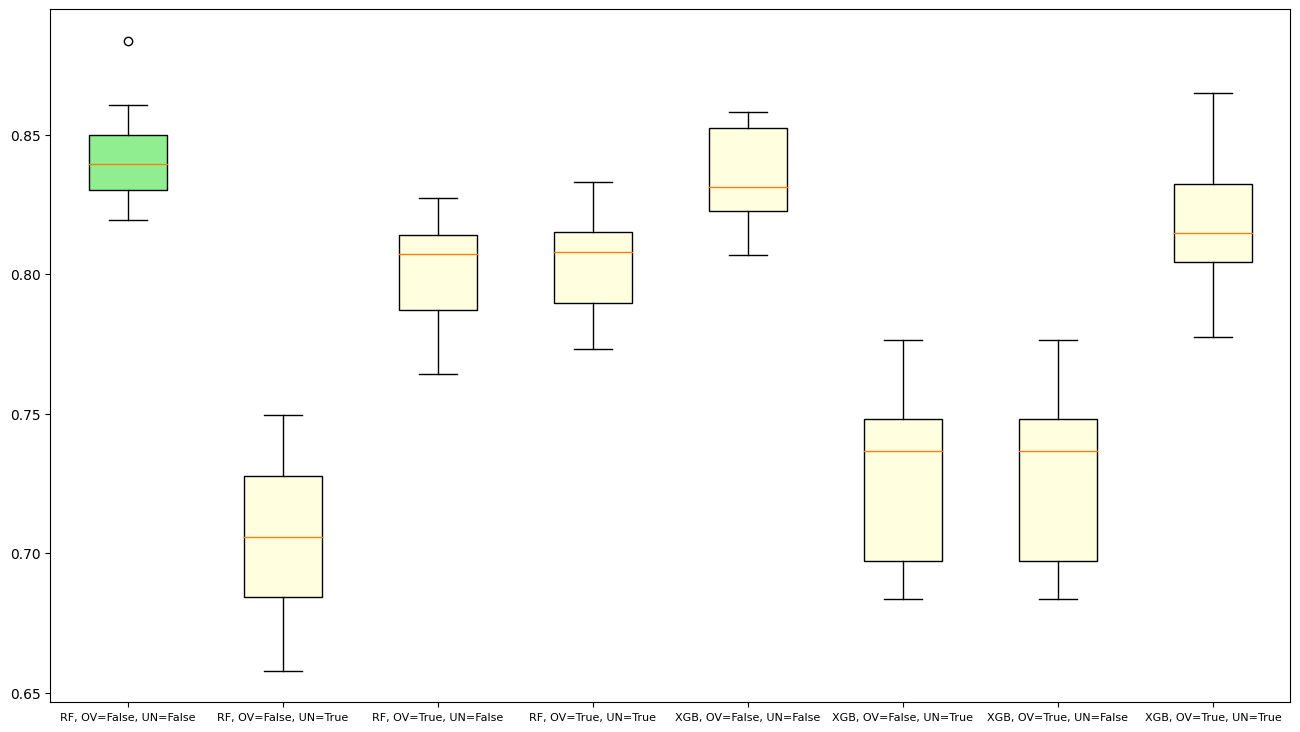

In [19]:
label_description_opinion = ['RF, OV=False, UN=False',  
                     'RF, OV=False, UN=True', 'RF, OV=True, UN=False',
                     'RF, OV=True, UN=True', 
                     'XGB, OV=False, UN=False', 'XGB, OV=False, UN=True', 
                     'XGB, OV=True, UN=False', 'XGB, OV=True, UN=True'
                    ]
data_opinion = [rf_ov_false_un_false.f_score_opinion,
         rf_ov_false_un_true.f_score_opinion, rf_ov_true_un_false.f_score_opinion, 
         rf_ov_true_un_true.f_score_opinion,
         xgb_ov_false_un_false.f_score_opinion, xgb_ov_false_un_true.f_score_opinion,
         xgb_ov_false_un_true.f_score_opinion, xgb_ov_true_un_true.f_score_opinion
        ]
plt_opinion = plot_boxplot(data_opinion, label_description_opinion)
plt_opinion.show()
plt_opinion.savefig('models/boxplot/boxplot_opinion.png', format='png')
plt_opinion.close()

#### Fake

In [20]:
print('RF, OV=True, UN=False X RF, OV=False, UN=False')
perform_fulltest(rf_ov_true_un_false.f_score_fake, rf_ov_false_un_false.f_score_fake, shapiro_wilk_p(rf_ov_true_un_false.f_score_fake), shapiro_wilk_p(rf_ov_false_un_false.f_score_fake))
print('RF, OV=True, UN=False X RF, OV=False, UN=True')
perform_fulltest(rf_ov_true_un_false.f_score_fake, rf_ov_false_un_true.f_score_fake, shapiro_wilk_p(rf_ov_true_un_false.f_score_fake), shapiro_wilk_p(rf_ov_false_un_true.f_score_fake))
print('RF, OV=True, UN=False X RF, OV=True, UN=True')
perform_fulltest(rf_ov_true_un_false.f_score_fake, rf_ov_true_un_true.f_score_fake, shapiro_wilk_p(rf_ov_true_un_false.f_score_fake), shapiro_wilk_p(rf_ov_true_un_true.f_score_fake))
print('RF, OV=True, UN=False X XGB, OV=False, UN=False')
perform_fulltest(rf_ov_true_un_false.f_score_fake, xgb_ov_false_un_false.f_score_fake, shapiro_wilk_p(rf_ov_true_un_false.f_score_fake), shapiro_wilk_p(xgb_ov_false_un_false.f_score_fake))
print('RF, OV=True, UN=False X XGB, OV=False, UN=True')
perform_fulltest(rf_ov_true_un_false.f_score_fake, xgb_ov_false_un_true.f_score_fake, shapiro_wilk_p(rf_ov_true_un_false.f_score_fake), shapiro_wilk_p(xgb_ov_false_un_true.f_score_fake))
print('RF, OV=True, UN=False X XGB, OV=True, UN=False')
perform_fulltest(rf_ov_true_un_false.f_score_fake, xgb_ov_true_un_false.f_score_fake, shapiro_wilk_p(rf_ov_true_un_false.f_score_fake), shapiro_wilk_p(xgb_ov_true_un_false.f_score_fake))
print('RF, OV=True, UN=False X XGB, OV=True, UN=True')
perform_fulltest(rf_ov_true_un_false.f_score_fake, xgb_ov_true_un_true.f_score_fake, shapiro_wilk_p(rf_ov_true_un_false.f_score_fake), shapiro_wilk_p(xgb_ov_true_un_true.f_score_fake))

RF, OV=True, UN=False X RF, OV=False, UN=False
	T-Student Test:
	Statistics=1.866, p=0.078
	The difference between the means is not statistically significant (do not reject H0)
RF, OV=True, UN=False X RF, OV=False, UN=True
	Wilcoxon Test:
	Statistics=4.000, p=0.014
	The difference between the means is statistically significant (reject H0)
RF, OV=True, UN=False X RF, OV=True, UN=True
	T-Student Test:
	Statistics=0.076, p=0.940
	The difference between the means is not statistically significant (do not reject H0)
RF, OV=True, UN=False X XGB, OV=False, UN=False
	Wilcoxon Test:
	Statistics=13.000, p=0.160
	The difference between the means is not statistically significant (do not reject H0)
RF, OV=True, UN=False X XGB, OV=False, UN=True
	T-Student Test:
	Statistics=1.250, p=0.227
	The difference between the means is not statistically significant (do not reject H0)
RF, OV=True, UN=False X XGB, OV=True, UN=False
	T-Student Test:
	Statistics=0.591, p=0.562
	The difference between the means is n

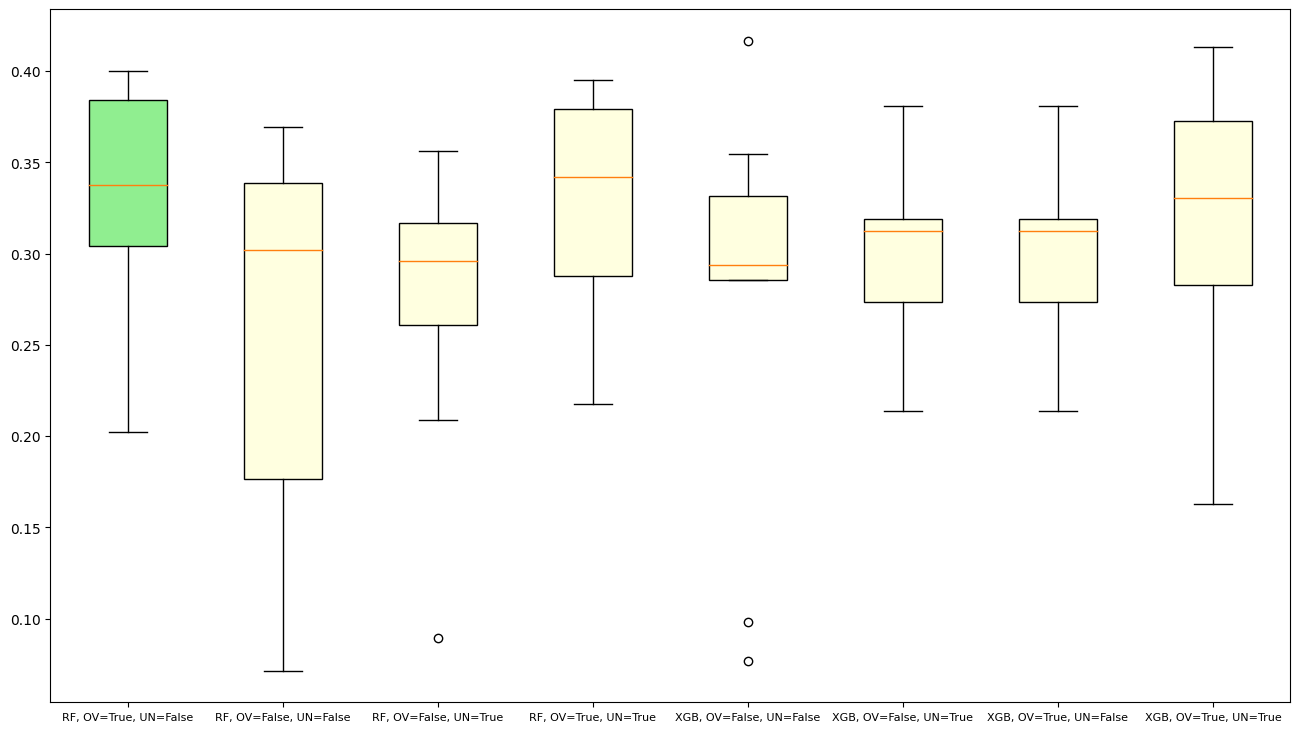

In [21]:
label_description_fake = ['RF, OV=True, UN=False', 
                     'RF, OV=False, UN=False', 'RF, OV=False, UN=True', 
                     'RF, OV=True, UN=True', 
                     'XGB, OV=False, UN=False', 'XGB, OV=False, UN=True', 
                     'XGB, OV=True, UN=False', 'XGB, OV=True, UN=True'
                    ]
data_fake = [rf_ov_true_un_false.f_score_fake, 
         rf_ov_false_un_false.f_score_fake, rf_ov_false_un_true.f_score_fake, 
         rf_ov_true_un_true.f_score_fake,
         xgb_ov_false_un_false.f_score_fake, xgb_ov_false_un_true.f_score_fake,
         xgb_ov_false_un_true.f_score_fake, xgb_ov_true_un_true.f_score_fake
        ]
plt_fake = plot_boxplot(data_fake, label_description_fake)
plt_fake.show()
plt_fake.savefig('models/boxplot/boxplot_fake.png', format='png')
plt.close()